# Pokemon: Generation I Capture Mechanism Modelling

In [1]:
# Import libraries
import random
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", palette=None)
import plotly.graph_objects as go

from ipywidgets import interactive
import ipywidgets as widgets

/Users/cindy/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Mechanism
Source:
- [https://www.dragonflycave.com/mechanics/gen-i-capturing](https://www.dragonflycave.com/mechanics/gen-i-capturing)
- [https://bulbapedia.bulbagarden.net/wiki/Catch_rate](https://bulbapedia.bulbagarden.net/wiki/Catch_rate)

The function `capture_pokemon` determines if the pokemon is caught or not, depending on four parameters:
- Ball
- Current Pokemon Status
- Capture rate of the Pokemon
- Current HP of the Pokemon

The outcome is determined by passing though two "filters":
- Filter 1 depends on Ball, Status and Capture rate.
- Filter 2 depends on Ball and HP.

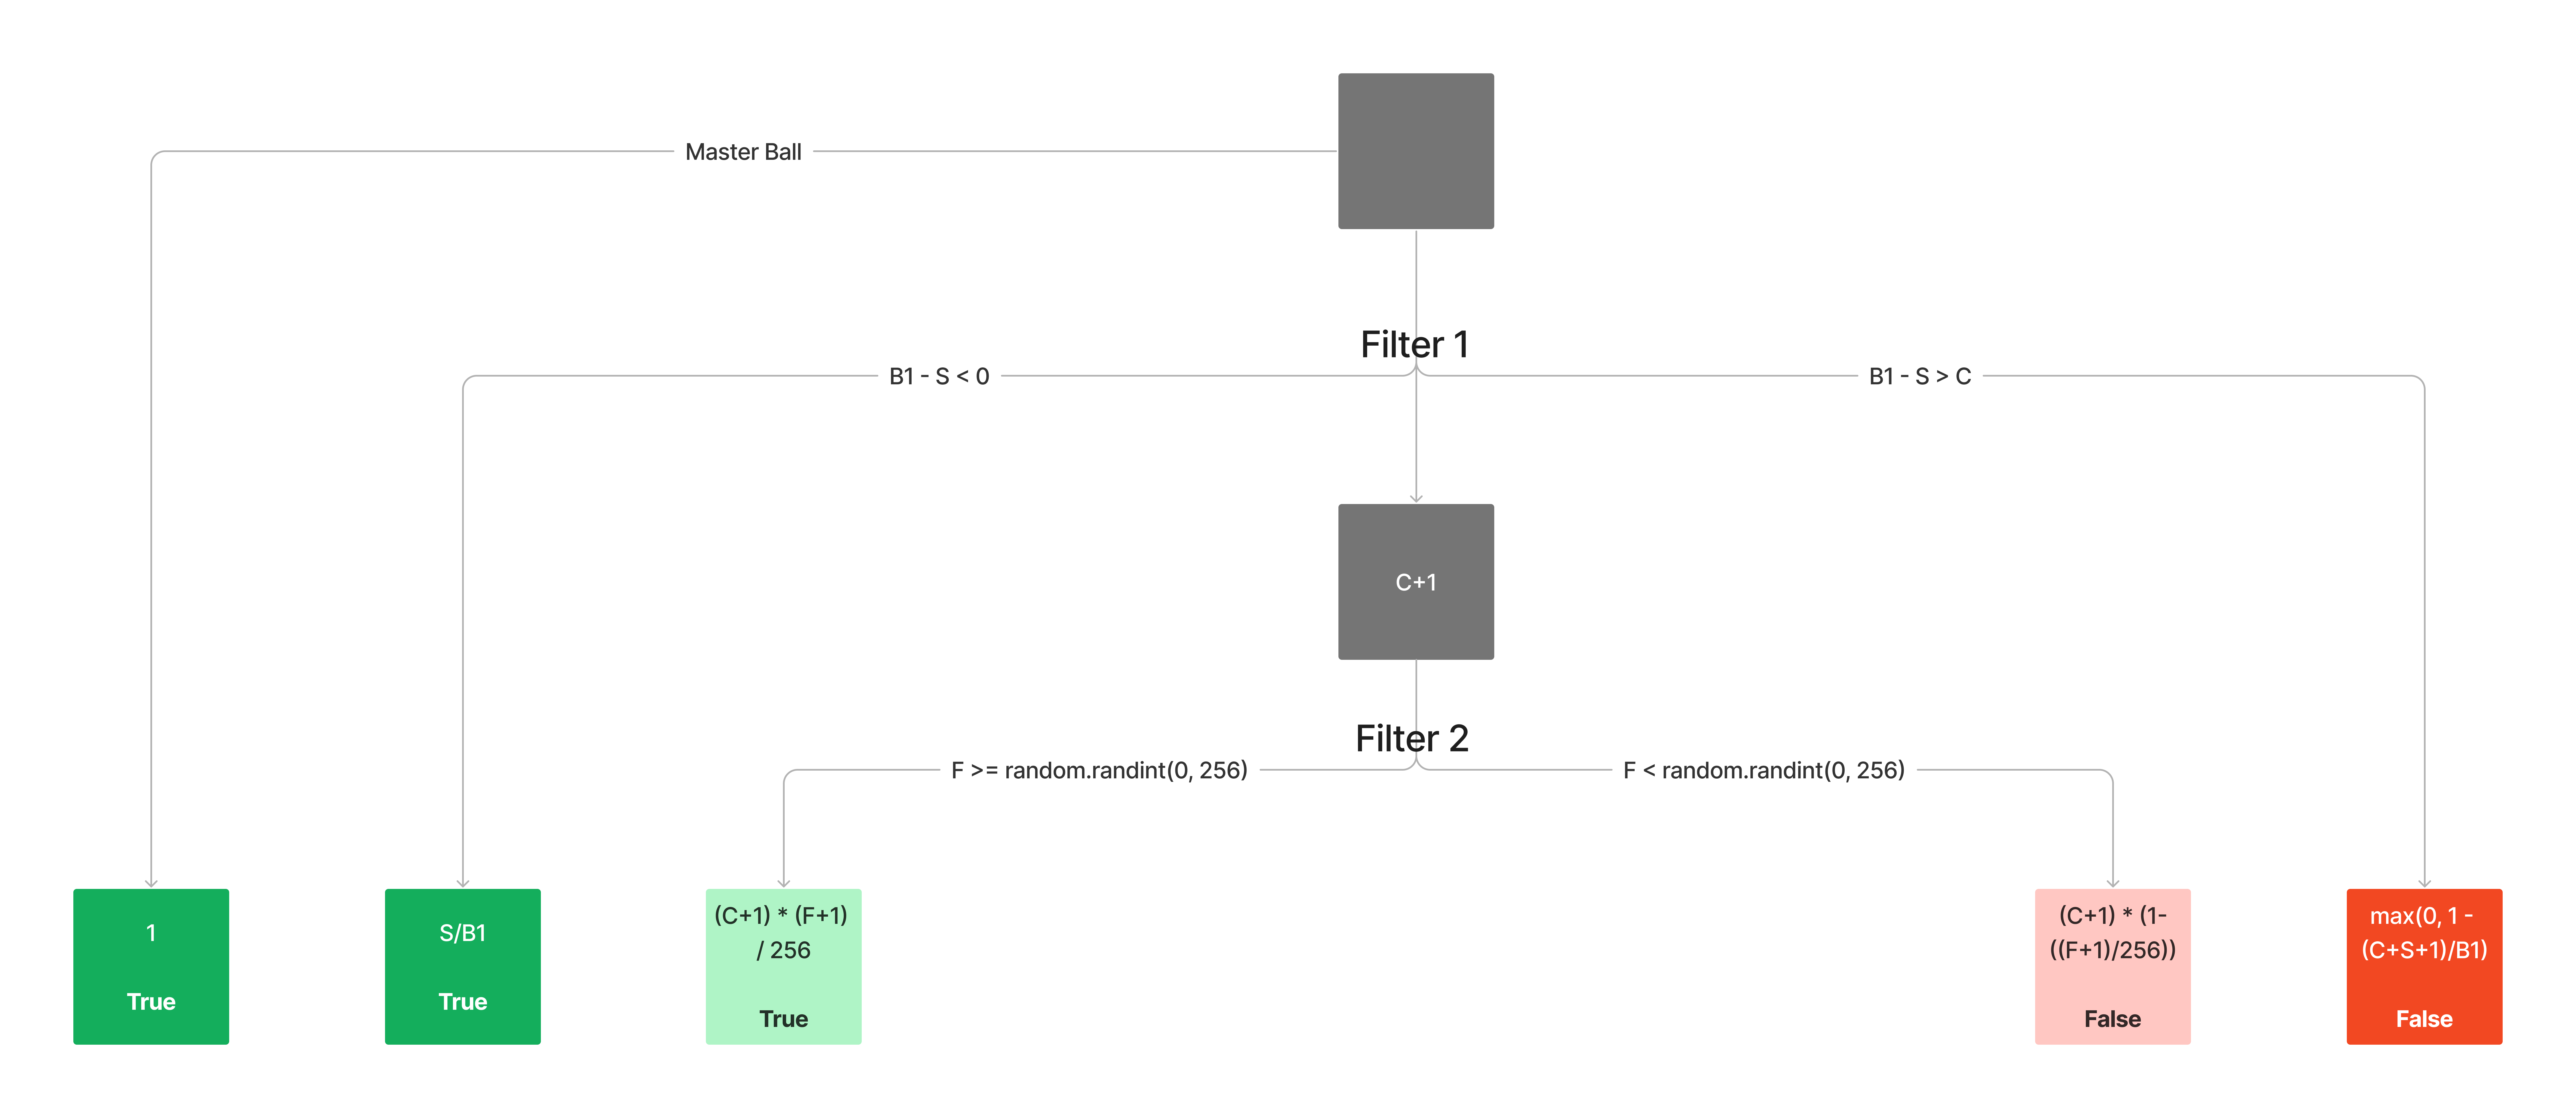

In [2]:
from IPython.display import Image
Image("flowchart.png")

In [3]:
def capture_pokemon(ball, status, capture_rate, hp):
    """
    Simulate the capture process and determine if the Pokémon is caught.
    
    Args:
        ball (str): Type of ball used ("Master Ball", "Poké Ball", "Great Ball", "Ultra Ball", "Safari Ball").
        status (str): Status condition of the Pokémon ("normal", "asleep", "frozen", "paralyzed", "burned", "poisoned").
        capture_rate (int): The capture rate of the Pokémon (from 3 to 255).
        hp (float): Percentage of current HP of the Pokemon (from 0 to 1)
        
    Returns:
        bool: True if the Pokémon is caught and False and if the Pokémon breaks free.
    """
    
    # Check entries
    valid_balls = ["Master Ball", "Poké Ball", "Great Ball", "Ultra Ball", "Safari Ball"]
    valid_status = ["normal", "asleep", "frozen", "paralyzed", "burned", "poisoned"]
    if capture_rate not in range(3, 256):
        raise ValueError(f"Invalid capture_rate. Please use enter a integer between 3 and 255.")
    if hp < 0.0 or hp > 1.0:
        raise ValueError(f"Invalid hp. Please use enter a number between 0 and 1.")

        
    # Variable B1 for types of Ball
    if ball == "Master Ball":
        return True
    elif ball == "Poké Ball":
        B1 = random.randint(0, 256)
    elif ball == "Great Ball":
        B1 = random.randint(0, 201)
    elif ball == "Ultra Ball" or "Safari Ball":
        B1 = random.randint(0, 151)
    else:
        raise ValueError(f"Invalid ball type. Please use one of the following: {valid_balls}")

        
    # Variable S for Pokemon status
    if status == "normal":
        S = 0
    elif status == "asleep" or "frozen":
        S = 25
    elif status == "paralyzed" or "burned" or "poisoned":
        S = 12
    else:
        raise ValueError(f"Invalid status. Please use one of the following: {valid_status}")
        
    
    
    # Filter 1: Ball, Status, Capture rate
    if B1 - S < 0:
        return True
    elif B1 - S > capture_rate:
        return False

    
    # Filter 2: Ball, HP 
    # Variable B2 for types of Ball
    if ball == "Great Ball":
        B2 = 8
    else:
        B2 = 12
    
    # Variable F depending on B2 and HP
    F = max(1, min(math.floor(255 * 4 / hp / B2), 255))
        
    if F >= random.randint(0, 256):
        return True
    else:
        return False

In [4]:
# Application example
capture_pokemon(ball="Poké Ball", status="normal", capture_rate=125, hp=0.5)

False

---

## Chance of Capture Calculation
The function `capture_chance` determines the probabilities of:
- capture after filter 1
- capture after filter 2
- fail after filter 2
- fail after filter 1

In [5]:
def capture_chance(ball, status, capture_rate, hp):
    """
    Calculate the chance the Pokemon is caught.
    
    Args:
        ball (str): Type of ball used ("Master Ball", "Poké Ball", "Great Ball", "Ultra Ball", "Safari Ball").
        status (str): Status condition of the Pokémon ("normal", "asleep", "frozen", "paralyzed", "burned", "poisoned").
        capture_rate (int): The capture rate of the Pokémon.
        hp (float): Percentage of current HP of the Pokemon (from 0 to 1)
        
    Returns:
        list of float: [
        chance of success after filter 1,
        chance of success after filter 2,
        chance of fail after filter 2,
        chance of fail after filter 1]
    """
    
    # Check entries
    valid_balls = ["Master Ball", "Poké Ball", "Great Ball", "Ultra Ball", "Safari Ball"]
    valid_status = ["normal", "asleep", "frozen", "paralyzed", "burned", "poisoned"]
    if capture_rate not in range(3, 256):
        raise ValueError(f"Invalid capture_rate. Please use enter a integer between 3 and 255.")
    if hp < 0.0 or hp > 1.0:
        raise ValueError(f"Invalid hp. Please use enter a number between 0 and 1.")

        
    # Variable B1 for types of Ball
    if ball == "Master Ball":
        return [1.0, 0.0, 0.0, 0.0]
    elif ball == "Poké Ball":
        B1 = 256
        B2 = 12
    elif ball == "Great Ball":
        B1 = 201
        B2 = 8
    elif ball == "Ultra Ball" or "Safari Ball":
        B1 = 151
        B2 = 12
    else:
        raise ValueError(f"Invalid ball type. Please use one of the following: {valid_balls}")

        
    # Variable S for Pokemon status
    if status == "normal":
        S = 0
    elif status == "asleep" or "frozen":
        S = 25
    elif status == "paralyzed" or "burned" or "poisoned":
        S = 12
    else:
        raise ValueError(f"Invalid status. Please use one of the following: {valid_status}")
        
    # Variable F for filter 2 calculation    
    F = max(1, min(math.floor(255 * 4 / hp / B2), 255))
    
    # Result
    p_success_1 = S/B1
    p_fail_1 = max(0, 1 - (capture_rate+S+1)/B1) # if negetive -> 0
    p_2 = 1 - p_success_1 - p_fail_1 # probability to go to filter 2
    p_success_2 = p_2 * ((F+1)/256)
    p_fail_2 = p_2 * (1-((F+1)/256))
    
    return [p_success_1, p_success_2, p_fail_2, p_fail_1]

In [6]:
# Application example
capture_chance(ball="Ultra Ball", status="normal", capture_rate=255, hp=0.5)

[0.0, 0.66796875, 0.33203125, 0]

### Visualization

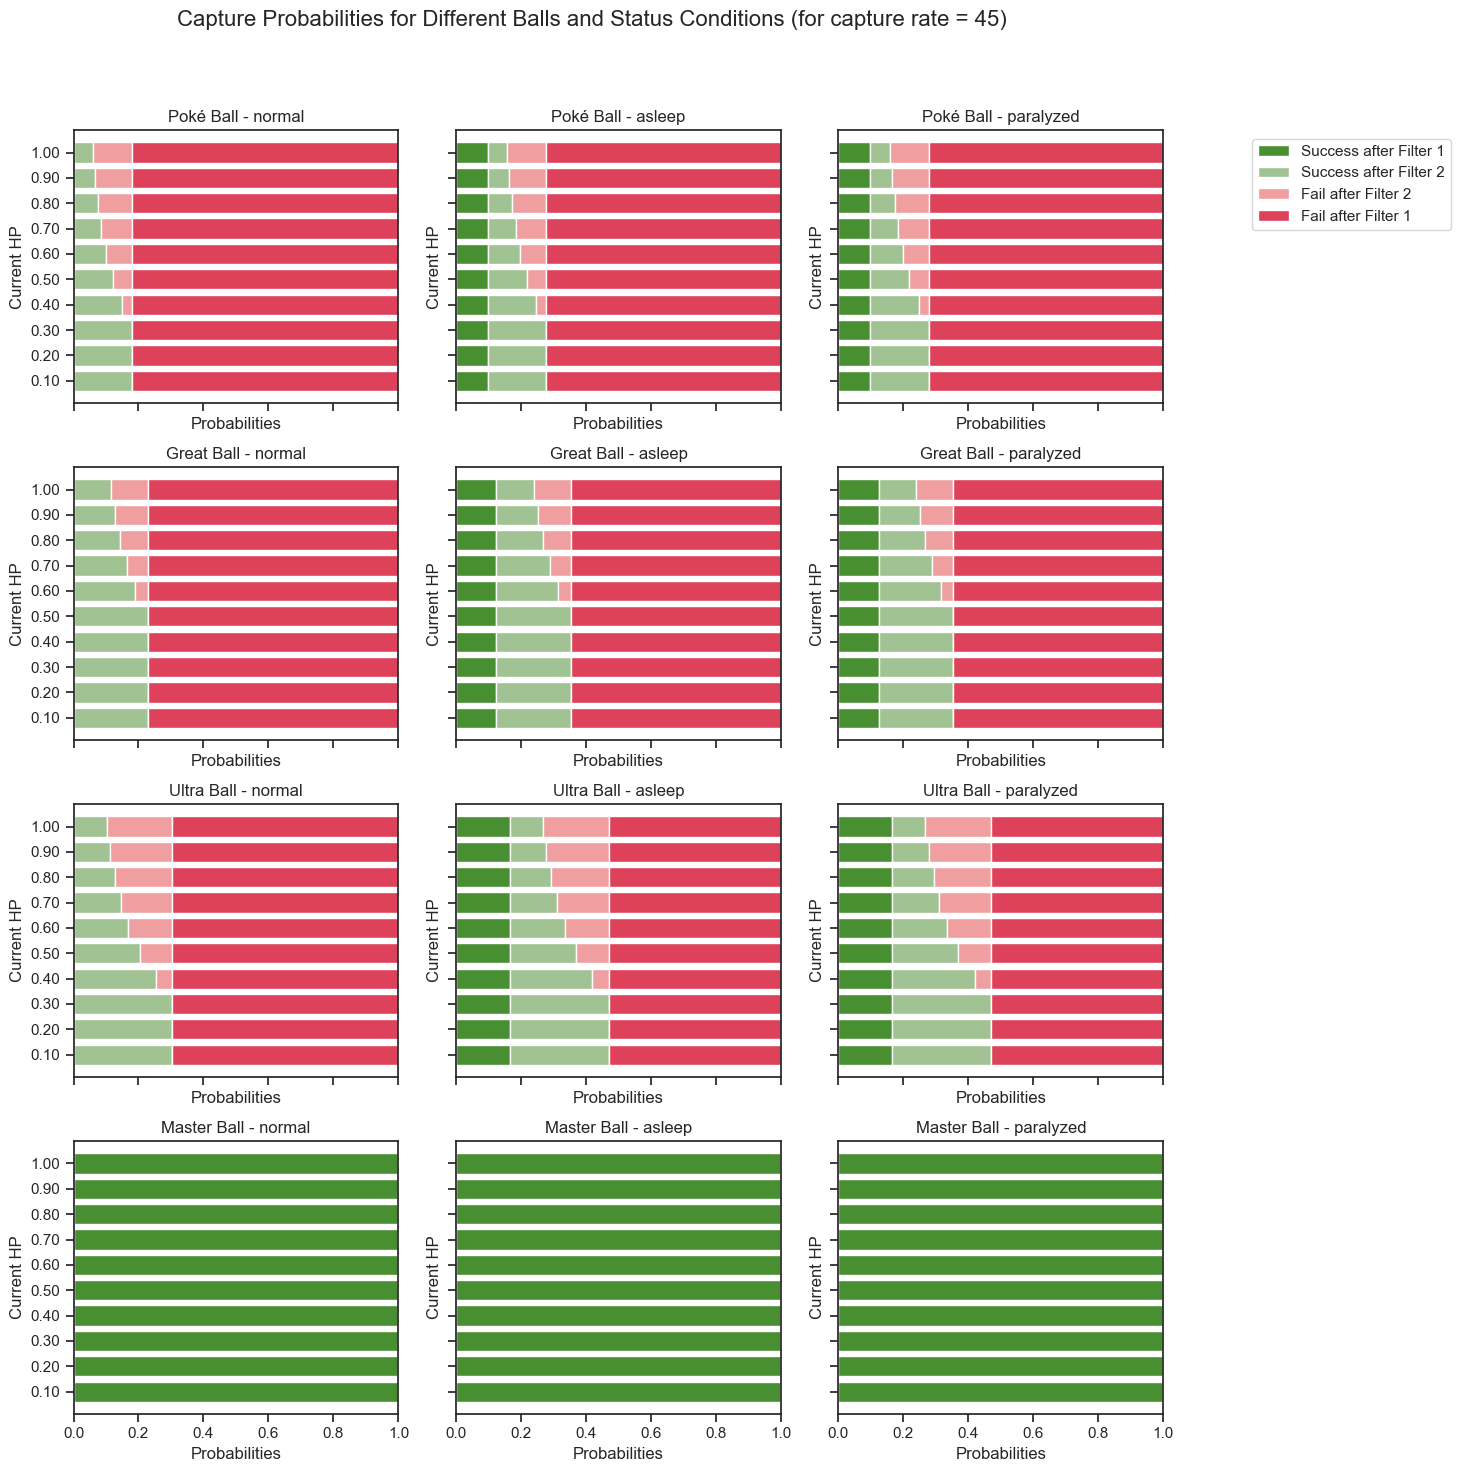

In [7]:
def filter_chance_plot(capture_rate):
    # Define parameter values
    hp_values = np.linspace(0.1, 1.0, 10)
    balls = ["Poké Ball", "Great Ball", "Ultra Ball", "Master Ball"]
    status_conditions = ["normal", "asleep", "paralyzed"]

    # Create subplots for each combination of ball and status
    fig, axes = plt.subplots(len(balls), len(status_conditions), figsize=(12, 15), sharex=True, sharey=True)

    # Loop through each combination of ball and status and create horizontal grouped stacked bar charts
    for ball_index, ball in enumerate(balls):
        for status_index, status in enumerate(status_conditions):
            probabilities = [capture_chance(ball, status, capture_rate, hp) for hp in hp_values]

            # Extract individual probabilities
            success_filter1 = [prob[0] for prob in probabilities]
            success_filter2 = [prob[1] for prob in probabilities]
            fail_filter2 = [prob[2] for prob in probabilities]
            fail_filter1 = [prob[3] for prob in probabilities]

            # Calculate position for bars within the group
            position = np.arange(len(hp_values))

            # Define colors
            colors = ['#488F31', '#A1C292', '#EF9FA0', '#DE425B']  # Dark Green, Light Green, Light Red, Dark Red

            # Create horizontal stacked bar chart for the current ball and status in the respective subplot
            axes[ball_index, status_index].barh(position, success_filter1, label='Success after Filter 1', color=colors[0])
            axes[ball_index, status_index].barh(position, success_filter2, label='Success after Filter 2', color=colors[1], left=success_filter1)
            axes[ball_index, status_index].barh(position, fail_filter2, label='Fail after Filter 2', color=colors[2], left=np.array(success_filter1) + np.array(success_filter2))
            axes[ball_index, status_index].barh(position, fail_filter1, label='Fail after Filter 1', color=colors[3], left=np.array(success_filter1) + np.array(success_filter2) + np.array(fail_filter2))

            # Set subplot titles and labels
            axes[ball_index, status_index].set_title(f'{ball} - {status}')
            axes[ball_index, status_index].set_yticks(position)
            axes[ball_index, status_index].set_yticklabels([f'{hp:.2f}' for hp in hp_values])
            axes[ball_index, status_index].set_ylabel('Current HP')
            axes[ball_index, status_index].set_xlabel('Probabilities')

    # Set overall plot title
    plt.suptitle('Capture Probabilities for Different Balls and Status Conditions (for capture rate = 45)', fontsize=16)

    # Adjust layout to prevent overlapping titles and labels
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.legend(loc='center left', bbox_to_anchor=(1.25, 4.5))
    plt.show()

# Vary capture_rate with the slider
# capture_rate_slider = interactive(filter_chance_plot, capture_rate=widgets.IntSlider(min=3, max=255, step=2, value=45))
# display(capture_rate_slider)

filter_chance_plot(capture_rate=45)

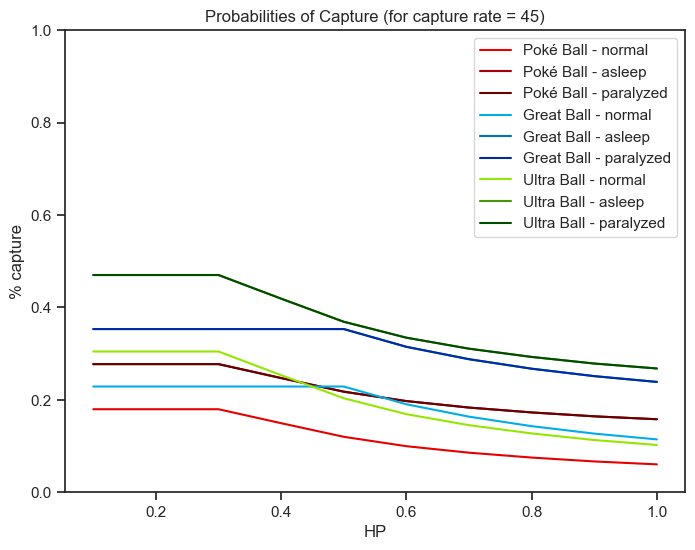

In [8]:
def total_chance_plot(capture_rate):
    hp_list = [i * 0.1 for i in range(1, 11)]
    pokeball_normal_chance = [sum(capture_chance("Poké Ball", "normal", capture_rate, hp)[:2]) for hp in hp_list]
    pokeball_asleep_chance = [sum(capture_chance("Poké Ball", "asleep", capture_rate, hp)[:2]) for hp in hp_list]
    pokeball_paralyzed_chance = [sum(capture_chance("Poké Ball", "paralyzed", capture_rate, hp)[:2]) for hp in hp_list]

    greatball_normal_chances = [sum(capture_chance("Great Ball", "normal", capture_rate, hp)[:2]) for hp in hp_list]
    greatball_asleep_chances = [sum(capture_chance("Great Ball", "asleep", capture_rate, hp)[:2]) for hp in hp_list]
    greatball_paralyzed_chances = [sum(capture_chance("Great Ball", "paralyzed", capture_rate, hp)[:2]) for hp in hp_list]

    ultraball_normal_chances = [sum(capture_chance("Ultra Ball", "normal", capture_rate, hp)[:2]) for hp in hp_list]
    ultraball_asleep_chances = [sum(capture_chance("Ultra Ball", "asleep", capture_rate, hp)[:2]) for hp in hp_list]
    ultraball_paralyzed_chances = [sum(capture_chance("Ultra Ball", "paralyzed", capture_rate, hp)[:2]) for hp in hp_list]

    plt.figure(figsize=(8, 6))

    plt.plot(hp_list, pokeball_normal_chance, label="Poké Ball - normal", color="#e60000")
    plt.plot(hp_list, pokeball_asleep_chance, label="Poké Ball - asleep", color="#a50006")
    plt.plot(hp_list, pokeball_paralyzed_chance, label="Poké Ball - paralyzed", color="#670000")

    plt.plot(hp_list, greatball_normal_chances, label="Great Ball - normal", color="#00ade6")
    plt.plot(hp_list, greatball_asleep_chances, label="Great Ball - asleep", color="#0070ce")
    plt.plot(hp_list, greatball_paralyzed_chances, label="Great Ball - paralyzed", color="#002ca0")

    plt.plot(hp_list, ultraball_normal_chances, label="Ultra Ball - normal", color="#95e600")
    plt.plot(hp_list, ultraball_asleep_chances, label="Ultra Ball - asleep", color="#469608")
    plt.plot(hp_list, ultraball_paralyzed_chances, label="Ultra Ball - paralyzed", color="#004c00")

    plt.xlabel('HP')
    plt.ylabel('% capture')
    plt.ylim(ymin=0, ymax=1)
    plt.title('Probabilities of Capture (for capture rate = 45)')
    plt.legend()
    plt.show()


# Vary capture_rate with the slider
# capture_rate_slider = interactive(total_chance_plot, capture_rate=widgets.IntSlider(min=3, max=255, step=2, value=45))
# display(capture_rate_slider)

total_chance_plot(capture_rate=45)

---